In [6]:
import praw
reddit = praw.Reddit(client_id ='tbxZ6eKXACO2JNFKHCQjPg', client_secret='_ZhaSATEothB1c2saebqKZRj7_kKkQ', user_agent='sen')


In [7]:
import pandas as pd
posts = []
topic = reddit.subreddit('MachineLearning')
for post in topic.hot(limit=10):
    posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created])
posts = pd.DataFrame(posts,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created'])
print(posts)

                                               title  score       id  \
0                        [D] Simple Questions Thread      7  17z08pk   
1  [D] I'm interviewing Rich Sutton in a week, wh...    119  187nbv8   
2  [P] Modified Tsetlin Machine implementation pe...     12  187vrpg   
3  [R] Hierarchically Gated Recurrent Neural Netw...     45  187iaw6   
4  YUAN-2.0-102B, with code and weights. Scores b...     10  187spj3   
5  [P] We integrated Netron into GitHub for visua...     22  187l3jp   
6                    [D] AAMAS 2024 Reviews Are Out!     10  187ilt5   
7  [P] NLP Project - In need of sports games tran...      1  1880a0p   
8  [R] Millions of new materials discovered with ...    198  186w67m   
9  [D] Insights from Deploying CodeLlama 34Bn Mod...     17  187bocu   

         subreddit                                                url  \
0  MachineLearning  https://www.reddit.com/r/MachineLearning/comme...   
1  MachineLearning  https://www.reddit.com/r/MachineLearning/

In [8]:
hot_posts = reddit.subreddit('all').hot(limit=10)
for post in hot_posts:
    print(post.title)

I think this is how shop cats are born 
This interview is just the gift that keeps on giving.
Keep on stacking
Slide Film from Vietnam that I found at a Thrift store in NC
Father comes home from Afghanistan to surprise his son before his game
Momma's trying her best 
World's most venomous fish
Difference between an iPhone 3GS and IPhone 15 Pro Max
Mom's neighbors put up a million watt crucifix for xmas
TIL Japan recounted its islands and found 7,000 it didn't know it had. There are now officially 14,125 islands in Japanese territory.


In [9]:
url= "https://www.reddit.com/r/CryptoCurrency/comments/16n6h6v/daily_crypto_discussion_september_20_2023_gmt0/"
submission = reddit.submission(url=url)
post_comments = []
submission.comments.replace_more(limit=100)
for comment in submission.comments.list():
    post_comments.append(comment.body)
post_comments = post_comments[1:]
post_comments

['Stocks absolutely plummeted today after the meeting while crypto remained stable, this is a win for us!',
 'What changes are needed for general adoption according to you guys?',
 'When do you guys plan to start DCAing out? Would you be happy to start after a 2x? Sooner?',
 "Anyone here DCAing into a bag for your kids? I'm considering doing so with $50-ish per month into BTC and ETH each, and waiting until they move out to give it to them (as a way to help them get on their feet.)\n\nYoungest is only 5, so I've got some time if I start now.",
 'What if our crypto investments never actually pay off?',
 "Don't forget that real wealth is built during bear markets. \n\nCongratulations if you're still around. \n\nThank yourself in 2025.",
 "1. Market range bound. Volatile 🦀 CRABS are inevitable.\n2. Tether authorizes $1B USDT to ‘replenish’ Tron network\n3. Judge denies SEC Access to Binance Software\n4. FTX Bankruptcy Estate Sues SBF's Parents to Claw Back ‘Misappropriated Funds'\n5. MOON

In [10]:
df = pd.DataFrame(post_comments)
df1 = pd.DataFrame(post_comments)
df.to_csv('jawaan.csv',index = False)

from textblob import TextBlob
import numpy as np
df['Sentiment'] = np.nan
df.columns = ['Comment','Sentiment']
df

,Comment,Sentiment
0,Stocks absolutely plummeted today after the me...,NaN
1,What changes are needed for general adoption a...,NaN
2,When do you guys plan to start DCAing out? Wou...,NaN
3,Anyone here DCAing into a bag for your kids? I...,NaN
4,What if our crypto investments never actually ...,NaN
...,...,...
4335,That would be difficult I think for most peopl...,NaN
4336,[removed],NaN
4337,"Possible, but honestly, in 5 years now, never ...",NaN
4338,I mean combined they did make 3 digits. Were t...,NaN


In [11]:
for index, row in df.iterrows():
    comment_polarity = TextBlob(row['Comment']).sentiment.polarity
    df.at[index,'Sentiment'] = comment_polarity
df

,Comment,Sentiment
0,Stocks absolutely plummeted today after the me...,0.600000
1,What changes are needed for general adoption a...,0.050000
2,When do you guys plan to start DCAing out? Wou...,0.800000
3,Anyone here DCAing into a bag for your kids? I...,0.000000
4,What if our crypto investments never actually ...,0.000000
...,...,...
4335,That would be difficult I think for most peopl...,0.000000
4336,[removed],0.000000
4337,"Possible, but honestly, in 5 years now, never ...",0.148571
4338,I mean combined they did make 3 digits. Were t...,-0.156250


In [12]:
unwanted_index = []
for index,row in df.iterrows():
    if row['Sentiment'] == 0.0:
        unwanted_index.append(index)
len(unwanted_index)


1748

In [13]:
final_data = df.drop(unwanted_index)
final_data

,Comment,Sentiment
0,Stocks absolutely plummeted today after the me...,0.600000
1,What changes are needed for general adoption a...,0.050000
2,When do you guys plan to start DCAing out? Wou...,0.800000
5,Don't forget that real wealth is built during ...,0.200000
6,1. Market range bound. Volatile 🦀 CRABS are in...,0.057143
...,...,...
4333,"Neutron I scooped up about 50$ bucks worth, sa...",-0.025000
4334,Yep I saw that comment thank you. \nI hope it’...,-0.071429
4337,"Possible, but honestly, in 5 years now, never ...",0.148571
4338,I mean combined they did make 3 digits. Were t...,-0.156250


In [14]:
final_data.describe()


,Sentiment
count,2592.000000
mean,0.179412
std,0.319199
min,-1.000000
25%,-0.020000
50%,0.188373
75%,0.375000
max,1.000000


In [15]:
positive_count = 0
negative_count = 0
for index, row in final_data.iterrows():
    if row['Sentiment'] > 0:
        positive_count += 1
    elif row['Sentiment'] < 0:
        negative_count += 1
print(positive_count, negative_count)

1910 682


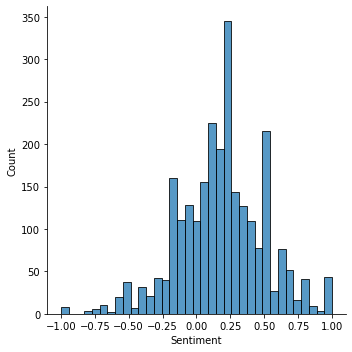

In [16]:
import seaborn as sns
sns.displot(x=final_data['Sentiment'])


In [17]:
import spacy
nlp = spacy.load("en_core_web_sm")
complete_doc = nlp(str(post_comments))
words = [token.text for token in complete_doc if not token.is_stop and not token.is_punct and token.pos_ == 'PROPN']
from collections import Counter
word_freq = Counter(words)
common_words = word_freq.most_common(10)
common_words

[('BTC', 147),
 ('ETH', 84),
 ('Bitcoin', 55),
 ('Moons', 49),
 ('Crypto', 40),
 ('FED', 36),
 ('Reddit', 29),
 ('FTX', 28),
 ('Binance', 26),
 ('Fed', 26)]

Text(0.5, 1.0, 'Top 10 frequently used positive words')

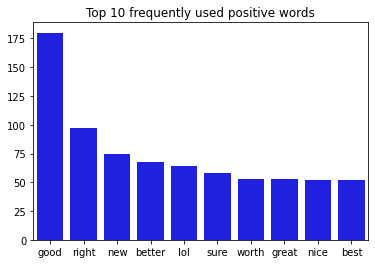

In [18]:
positive_words = [token.text for token in complete_doc if not token.is_stop and not token.is_punct and TextBlob(str(token)).sentiment.polarity > 0]
positive_freq = Counter(positive_words)
common_positive_words = positive_freq.most_common(10)
common_positive_words
a,b = zip(*common_positive_words)
a = np.array(a)
b = np.array(b)
sns.barplot(x=a,y=b,color = 'blue').set_title('Top 10 frequently used positive words')


In [19]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

import nltk
nltk.download('wordnet')
stemmer = PorterStemmer()
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result
processed_docs = df1[0].map(preprocess)
processed_docs[:10]

[nltk_data] Error loading wordnet: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


0    [stock, absolut, plummet, today, meet, crypto,...
1             [chang, need, gener, adopt, accord, guy]
2        [guy, plan, start, dca, happi, start, sooner]
3    [dca, kid, consid, month, wait, help, feet, yo...
4                             [crypto, invest, actual]
5    [forget, real, wealth, build, bear, market, co...
6    [market, rang, bind, volatil, crab, inevit, te...
7    [favourit, govern, poll, pass, rent, banner, m...
8    [guy, ideal, price, moon, bullrun, love, hope,...
9                      [buy, moon, buy, averag, price]
Name: 0, dtype: object

In [20]:
#Bag of Words
dictionary = gensim.corpora.Dictionary(processed_docs)
dictionary.filter_extremes(no_below=10, no_above=0.5, keep_n=100000)
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]






bow_doc_310 = bow_corpus[310]
for i in range(5):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_310[i][0],dictionary[bow_doc_310[i][0]],bow_doc_310[i][1]))



Word 0 ("absolut") appears 1 time.
Word 39 ("moon") appears 1 time.
Word 70 ("money") appears 1 time.
Word 75 ("drop") appears 1 time.
Word 170 ("think") appears 1 time.


In [21]:
from gensim import corpora, models
ldamodel = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)
topics = ldamodel.print_topics(num_words=8)
for topic in topics:
   print(topic)

(0, '0.045*"crypto" + 0.043*"delet" + 0.042*"remov" + 0.029*"moon" + 0.021*"price" + 0.016*"bitcoin" + 0.015*"project" + 0.015*"hour"')
(1, '0.027*"market" + 0.022*"crypto" + 0.017*"month" + 0.017*"like" + 0.017*"bull" + 0.017*"think" + 0.016*"better" + 0.016*"go"')
(2, '0.039*"like" + 0.021*"time" + 0.019*"mean" + 0.018*"feel" + 0.016*"thank" + 0.016*"right" + 0.016*"moon" + 0.015*"yeah"')
(3, '0.042*"go" + 0.036*"know" + 0.032*"moon" + 0.029*"crypto" + 0.022*"coin" + 0.020*"think" + 0.019*"happen" + 0.019*"buy"')
(4, '0.038*"crypto" + 0.032*"moon" + 0.030*"think" + 0.028*"work" + 0.026*"thank" + 0.022*"profit" + 0.020*"peopl" + 0.019*"good"')
(5, '0.035*"moon" + 0.023*"think" + 0.023*"month" + 0.020*"ratio" + 0.017*"rate" + 0.017*"earn" + 0.017*"time" + 0.015*"hike"')
(6, '0.030*"think" + 0.030*"market" + 0.024*"coin" + 0.023*"crypto" + 0.022*"moon" + 0.021*"today" + 0.017*"hope" + 0.015*"reach"')
(7, '0.026*"good" + 0.020*"crypto" + 0.018*"think" + 0.017*"look" + 0.016*"get" + 0.016

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline

vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
x = vectorizer.fit_transform(df1[0])
#n_Components  = Number of Topics
lsa = TruncatedSVD(n_components=10,n_iter=100)
lsa.fit(x)
terms = vectorizer.get_feature_names_out() 
print(lsa.components_)


[[ 3.27352223e-06  7.33078223e-06  2.27172388e-08 ...  3.70409785e-08
   4.60374683e-07  2.41064949e-07]
 [ 6.46024946e-06  3.42050984e-05  1.88922547e-07 ...  1.45454343e-06
   2.44623451e-06  5.53084362e-07]
 [ 5.71191006e-03  2.46239150e-02  3.45280592e-04 ...  5.30873793e-04
   1.13433914e-03  2.61428178e-04]
 ...
 [-8.94890427e-04 -2.78901985e-03  1.60405274e-04 ... -2.28240316e-05
  -5.15498116e-04 -9.34590698e-04]
 [ 6.35672753e-03  8.55230790e-03  5.20140893e-05 ... -2.65806088e-04
   3.71076261e-04  6.90159980e-04]
 [ 3.73872014e-03 -5.23947455e-03 -2.92963444e-05 ... -5.13057469e-04
   3.55641166e-03 -7.81721545e-04]]


In [23]:
for ind,comp in enumerate(lsa.components_):
    termsInComp = zip(terms,comp)
    sortedTerms = sorted(termsInComp, key=lambda x: x[1],reverse=True)[:7]
    print("Concept %d" % ind)
    for term in sortedTerms:
        print(term[0])
    print(" ")

Concept 0
deleted
ask
removed
comments
distribution
distributions
hundreds
 
Concept 1
removed
post
difficult
just
won
make
sneks
 
Concept 2
moons
btc
crypto
eth
think
just
like
 
Concept 3
moons
binance
earned
month
distribution
reach
matic
 
Concept 4
btc
eth
coin
alts
buy
buying
portfolio
 
Concept 5
bull
market
run
bear
think
crab
time
 
Concept 6
crypto
bull
market
run
bear
moons
eth
 
Concept 7
think
crypto
eth
ll
btc
moons
happen
 
Concept 8
day
today
like
comments
daily
good
10k
 
Concept 9
thanks
good
advice
eth
moon
coin
buy
 


In [24]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import re
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
data = pd.read_csv("C:/Users/senth/Downloads/flipkart_data.csv")
data.head()


,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


In [25]:
pd.unique(data['rating'])

array([5, 4, 1, 3, 2], dtype=int64)

<AxesSubplot:xlabel='rating', ylabel='count'>

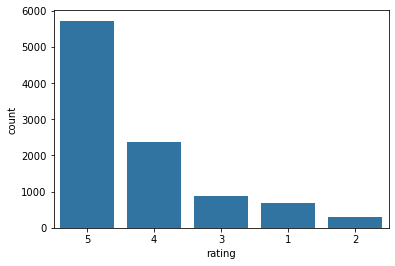

In [26]:
sns.countplot(data=data,
              x='rating',
              order=data.rating.value_counts().index)

In [27]:
from tqdm import tqdm


def preprocess_text(text_data):
    preprocessed_text = []

    for sentence in tqdm(text_data):
        # Removing punctuations
        sentence = re.sub(r'[^\w\s]', '', sentence)

        # Converting lowercase and removing stopwords
        preprocessed_text.append(' '.join(token.lower()
                                        for token in nltk.word_tokenize(sentence)
                                        if token.lower() not in stopwords.words('english')))

    return preprocessed_text
# rating label(final)
pos_neg = []
for i in range(len(data['rating'])):
    if data['rating'][i] >= 5:
        pos_neg.append(1)
    else:
        pos_neg.append(0)

data['label'] = pos_neg


In [5]:
preprocessed_review = preprocess_text(data['review'].values)
data['review'] = preprocessed_review

100%|█████████████████████████████████████████████████████████████████████████████| 9976/9976 [00:45<00:00, 217.02it/s]


In [6]:
data.head()

,review,rating,label
0,nice produt like design lot easy carry looked ...,5,1
1,awesome soundvery pretty see nd sound quality ...,5,1
2,awesome sound quality pros 78 hrs battery life...,4,0
3,think good product per quality also design qui...,5,1
4,awesome bass sound quality good bettary long l...,5,1


In [7]:
data["label"].value_counts()

label
1    5726
0    4250
Name: count, dtype: int64

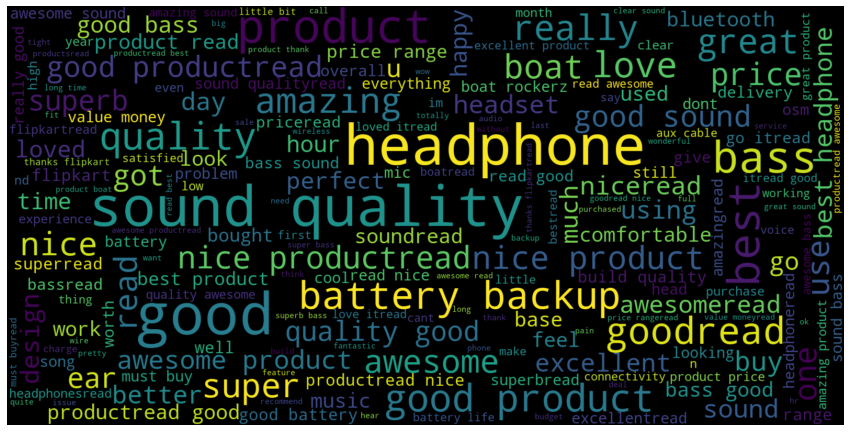

In [8]:
consolidated = ' '.join(
    word for word in data['review'][data['label']==1].astype(str))
wordCloud = WordCloud(width=1600, height=800,
                      random_state=21, max_font_size=110)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()
